<a href="https://colab.research.google.com/github/RyanSfernandes/analise-futebol/blob/main/Analise_Explorat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# carregando bibliotecas

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Leitura do Arquivo

In [ ]:
df = pd.read_csv('scouts_2015.csv')

### Parte 1: Compreensão e Limpeza dos Dados

In [ ]:
df.head (5)

,atleta_id,apelido,rodada_id,ano,clube_id,clube,posicao_id,posicao,jogos_num,pontos_num,...,FC,GC,CA,CV,SG,DD,DP,GS,status_id,status
0,87552,Vitor Bueno,27,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
1,87552,Vitor Bueno,28,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
2,87552,Vitor Bueno,29,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
3,87552,Vitor Bueno,30,2015,277,Santos,4,mei,1,0.0,...,0,0,0,0,0,0,0,0,0,NaN
4,87552,Vitor Bueno,31,2015,277,Santos,4,mei,2,-0.3,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
# verificando se há valores ausentes no dataframe(missings)
if df.isnull().values.any():
  print("Existem valores ausentes no DataFrame.")

  missing_values = df.isnull().sum()
  missing_cols = missing_values[missing_values > 0]

  print("\nColunas com valores ausentes:")
  print(missing_cols)
else:
  print("Não existem valores ausentes no DataFrame.")

Não existem valores ausentes no DataFrame.


In [ ]:
# Conta o número de jogadores distintos (atleta_id)
num_jogadores_distintos = df['atleta_id'].nunique()

print(f"Existem {num_jogadores_distintos} jogadores distintos nesse conjunto de dados.")

Existem 1022 jogadores distintos nesse conjunto de dados.


In [ ]:
# Conta o número de rodadas distintas
num_rodadas = df['rodada_id'].nunique()

print(f"Foram registradas {num_rodadas} rodadas no conjunto de dados.")

Foram registradas 36 rodadas no conjunto de dados.


In [ ]:
# eliminando colunas que têm mais da metade dos dados ausentes
percent_missing = df.isnull().sum() * 100 / len(df)

cols_to_drop = percent_missing[percent_missing > 50].index

df = df.drop(columns=cols_to_drop)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29720 entries, 0 to 29719
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   atleta_id           29720 non-null  int64  
 1   apelido             29720 non-null  object 
 2   rodada_id           29720 non-null  int64  
 3   ano                 29720 non-null  int64  
 4   clube_id            29720 non-null  int64  
 5   clube               29720 non-null  object 
 6   posicao_id          29720 non-null  int64  
 7   posicao             29720 non-null  object 
 8   jogos_num           29720 non-null  int64  
 9   pontos_num          29720 non-null  float64
 10  media_num           29720 non-null  float64
 11  preco_num_anterior  29720 non-null  float64
 12  preco_num           29720 non-null  float64
 13  variacao_num        29720 non-null  float64
 14  FS                  29720 non-null  int64  
 15  PE                  29720 non-null  int64  
 16  A   



#### Parte 2: Estatísticas Descritivas

In [ ]:
# média de pontos por cada rodada
media_pontos_por_rodada = df.groupby('rodada_id')['pontos_num'].mean()

print(media_pontos_por_rodada)

rodada_id
1     0.883538
2     1.055750
3     0.886453
4     0.984207
5     1.098376
6     0.891890
7     0.728041
8     0.680588
9     0.835067
10    1.033236
11    1.101998
12    1.169719
13    1.080411
14    0.930436
15    1.033482
16    0.831799
17    1.064703
18    0.940484
19    0.975795
20    0.928530
21    1.104503
22    1.076606
23    0.972257
24    0.890867
25    0.948058
27    0.842816
28    0.858592
29    0.840301
30    0.921552
31    1.031723
32    1.019374
33    0.815114
34    0.980528
35    0.829591
36    0.943993
37    0.956278
Name: pontos_num, dtype: float64


In [ ]:
# exibindo o jogador com maior pontuação
jogador_max_pontuacao = df.loc[df['pontos_num'].idxmax()]

print(f"O jogador com a maior pontuação em uma única rodada é: {jogador_max_pontuacao['apelido']}")
print(f"Pontuação máxima: {jogador_max_pontuacao['pontos_num']}")

O jogador com a maior pontuação em uma única rodada é: Willian
Pontuação máxima: 32.7


In [ ]:
# Exibição do top 5 jogadores com maior pontuação
jogos_por_jogador = df.groupby('apelido')['atleta_id'].count()

jogadores_ordenados = jogos_por_jogador.sort_values(ascending=False)

top_5_jogadores = jogadores_ordenados.head(5)

print(top_5_jogadores)

apelido
Juninho       203
João Paulo    202
Henrique      201
Gabriel       180
Marquinhos    156
Name: atleta_id, dtype: int64


In [ ]:
distribuicao_por_posicao = df['posicao_id'].value_counts(normalize=True) * 100
print(distribuicao_por_posicao)

posicao_id
4    33.351279
5    21.470390
3    16.285330
2    15.874832
1    10.518170
6     2.500000
Name: proportion, dtype: float64


In [ ]:
# exibição do clube que tem a maior soma de pontos acumulados
soma_por_campeonato = df.groupby('clube')['pontos_num'].sum()
print(soma_por_campeonato)

clube_max_pontos = soma_por_campeonato.idxmax()

print(f"O clube com a maior soma de pontos acumulados é: {clube_max_pontos}")
print(f"Pontuação total: {soma_por_campeonato.max()}")

clube
Atlético-MG      1547.02
Atlético-PR      1416.10
Avaí              957.27
Chapecoense      1297.63
Corinthians      2007.15
Coritiba         1253.25
Cruzeiro         1410.25
Figueirense      1175.19
Flamengo         1385.88
Fluminense       1279.07
Goiás            1413.46
Grêmio           1492.77
Internacional    1388.76
Joinville        1180.21
Palmeiras        1589.80
Ponte Preta      1496.56
Santos           1516.27
Sport            1600.03
São Paulo        1694.98
Vasco            1104.87
Name: pontos_num, dtype: float64
O clube com a maior soma de pontos acumulados é: Corinthians
Pontuação total: 2007.15


##### Parte 3: Análise Gráfica e visualização dos Dados

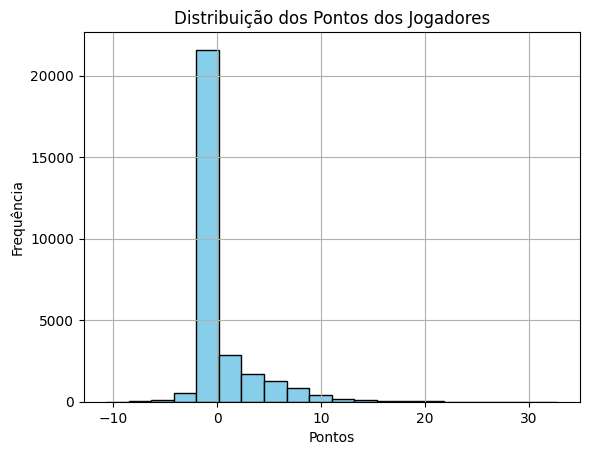

In [ ]:
# distribuição dos pontos dos jogadores

plt.hist(df['pontos_num'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Pontos dos Jogadores')
plt.grid(True)

plt.show()

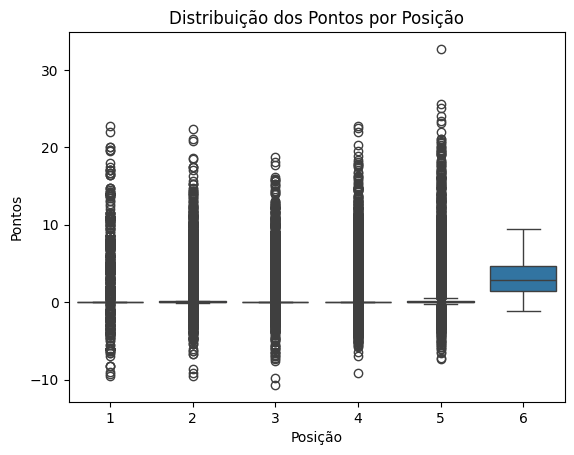

In [ ]:
sns.boxplot(x='posicao_id', y='pontos_num', data=df)
plt.xlabel('Posição')
plt.ylabel('Pontos')
plt.title('Distribuição dos Pontos por Posição')
plt.show()

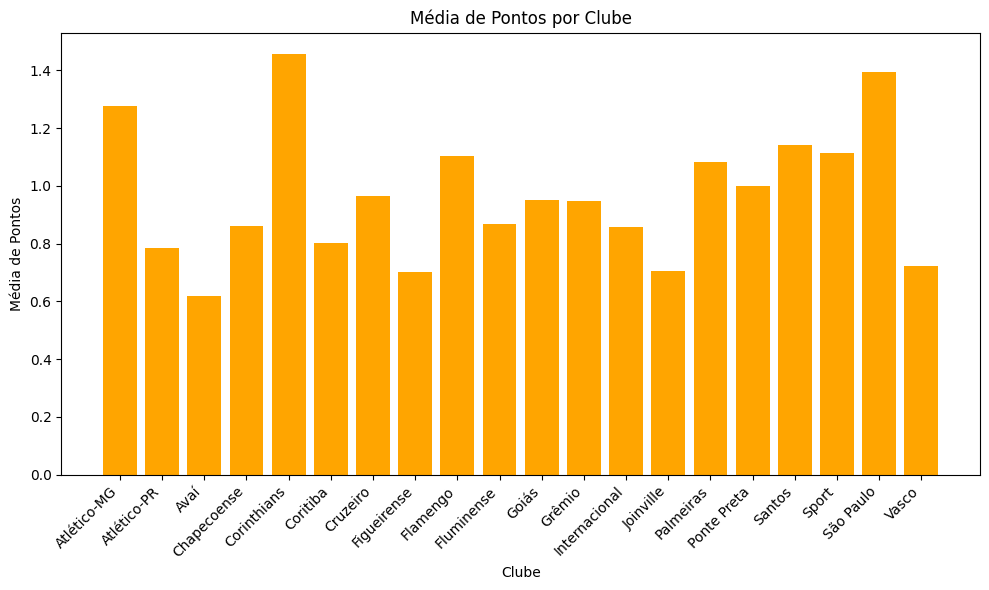

In [ ]:
media_pontos_por_clube = df.groupby('clube')['pontos_num'].mean()

plt.figure(figsize=(10, 6))
plt.bar(media_pontos_por_clube.index, media_pontos_por_clube.values, color='orange')
plt.xlabel('Clube')
plt.ylabel('Média de Pontos')
plt.title('Média de Pontos por Clube')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


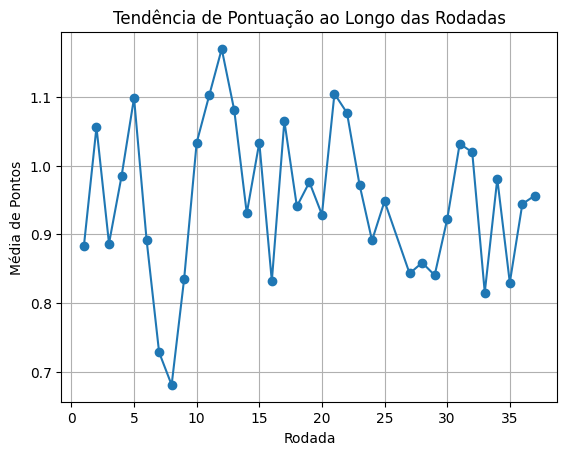

In [ ]:
media_pontos_por_rodada = df.groupby('rodada_id')['pontos_num'].mean()


plt.plot(media_pontos_por_rodada.index, media_pontos_por_rodada.values, marker='o', linestyle='-')

plt.xlabel('Rodada')
plt.ylabel('Média de Pontos')
plt.title('Tendência de Pontuação ao Longo das Rodadas')

plt.grid(True)
plt.show()

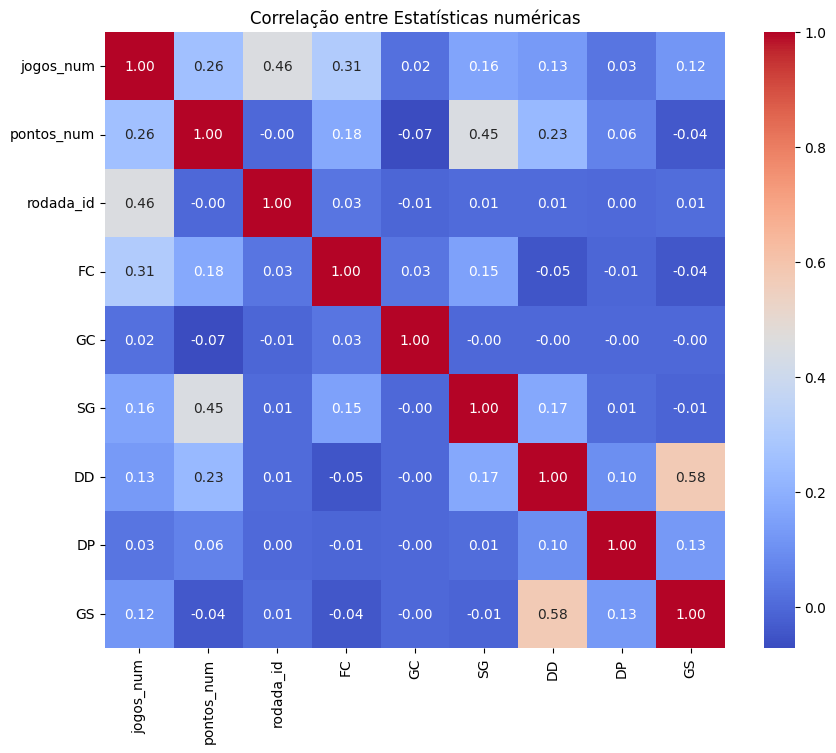

In [ ]:
# gráfico de correlação entre as estatisticas numericas
selected_cols = ['jogos_num', 'pontos_num', 'rodada_id', 'FC', 'GC', 'SG', 'DD', 'DP', 'GS']
correlation_matrix = df[selected_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Estatísticas numéricas')
plt.show()

######Parte 4: Insights e Tendências

In [ ]:
media_pontos_por_posicao = df.groupby('posicao')['pontos_num'].mean()
print(media_pontos_por_posicao)
# os jogadores que pertecem a posição atacante e lateral, tem uma maior pontuação

posicao
ata    1.016314
gol    0.784229
lat    1.031814
mei    0.758697
tec    3.135289
zag    0.940517
Name: pontos_num, dtype: float64


In [ ]:
correlacao = df['FC'].corr(df['GS'])
print(f"Correlação entre finalizações e gols: {correlacao}")

Correlação entre finalizações e gols: -0.04366425774543985


In [ ]:
# média de cartões amarelos por clube
cartoes_amarelos_por_jogador = df.groupby('apelido')['CA'].mean()

cartoes_amarelos_por_clube = pd.merge(cartoes_amarelos_por_jogador, df[['apelido', 'clube']], on='apelido', how='left')

media_cartoes_por_clube = cartoes_amarelos_por_clube.groupby('clube')['CA'].mean()

clubes_ordenados = media_cartoes_por_clube.sort_values(ascending=False)
print(clubes_ordenados.head(5))

clube
Avaí           0.079045
Figueirense    0.066805
Vasco          0.066556
Coritiba       0.065338
Goiás          0.065112
Name: CA, dtype: float64


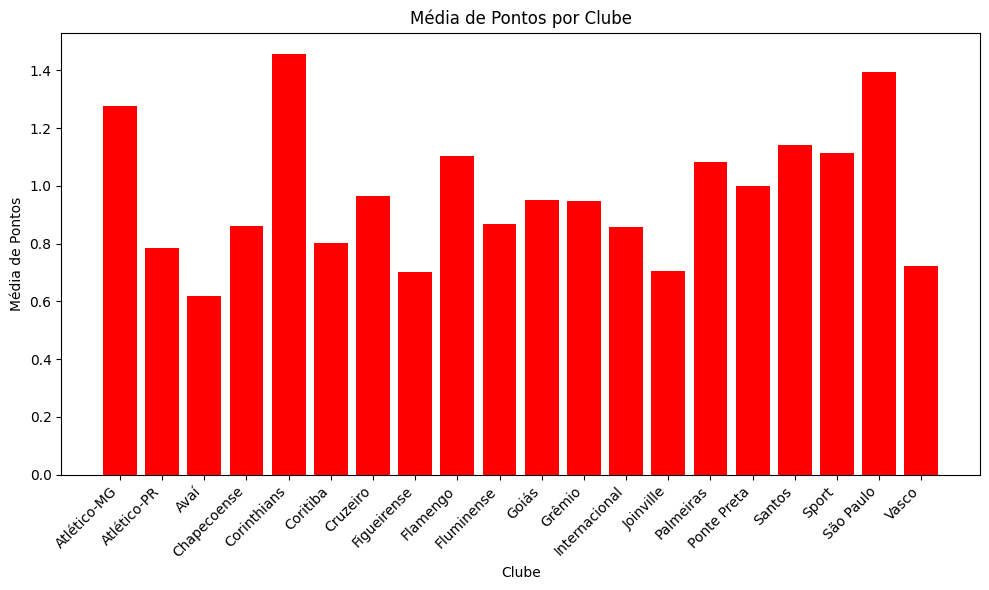

In [ ]:
media_pontos_por_clube = df.groupby('clube')['pontos_num'].mean()

plt.figure(figsize=(10, 6))
plt.bar(media_pontos_por_clube.index, media_pontos_por_clube.values, color='red')
plt.xlabel('Clube')
plt.ylabel('Média de Pontos')
plt.title('Média de Pontos por Clube')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# o time que apresenta queda é o Avaí

In [ ]:
#Insight 1: Focar em jogadores de posições com maior média de pontos,
#Insight 2: Explorar a relação entre finalizações e gols para as posições de ataque,
#Insight 3: Monitorar e controlar a disciplina dos jogadores, especialmente em clubes com maior média de cartões amarelos.